In [1]:
import tensorflow as tf
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
assert X_train.shape == (60000, 28, 28)
assert X_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)


2024-05-22 00:20:51.766775: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


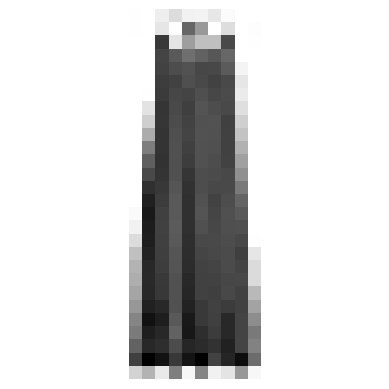

In [2]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2137], cmap="binary")
plt.axis('off')
plt.show()

In [3]:
class_names = ["koszulka", "spodnie", "pulower", "sukienka", "kurtka",
"sandał", "koszula", "but", "torba", "kozak"]
class_names[y_train[2137]]


'sukienka'

In [4]:
tf.__version__

'2.12.0'

Ex 1.

In [5]:
X_train = X_train/255.0
y_train = y_train/255.0


In [6]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Flatten(input_shape = [28,28]),
        tf.keras.layers.Dense(300, activation = "relu"),
        tf.keras.layers.Dense(100, activation = "relu"),
        tf.keras.layers.Dense(10, activation = "softmax")
    ]
)

2024-05-22 00:21:11.907723: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


(60000,)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


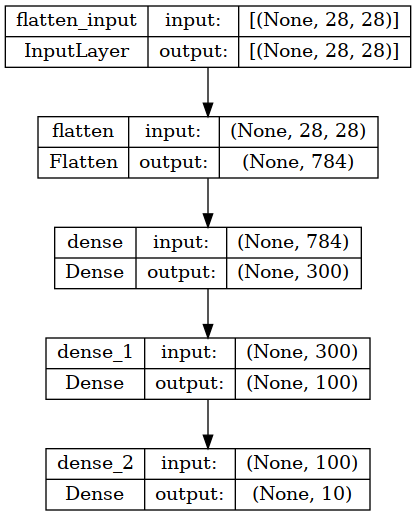

In [7]:
print(y_train.shape)
model.summary()
tf.keras.utils.plot_model(model, "fashion_mnist.png", show_shapes=True)

In [8]:
model.compile(
    loss = tf.keras.losses.sparse_categorical_crossentropy,
    optimizer = tf.keras.optimizers.SGD(),
    metrics=["accuracy"]
)

In [9]:
import os
logdir = os.path.join(os.curdir, "image_logs")
tensorboard_cb = tf.keras.callbacks.TensorBoard(logdir)

In [10]:
history = model.fit(X_train, y_train, epochs=20, 
                    validation_split=0.1,
                    validation_data=(X_test, y_test), 
                    callbacks=[tensorboard_cb])

Epoch 1/20
1875/1875 [==============================] - 10s 4ms/step - loss: 0.0113 - accuracy: 0.1000 - val_loss: 4419.7163 - val_accuracy: 0.1000
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 6.8083e-04 - accuracy: 0.1000 - val_loss: 5021.3745 - val_accuracy: 0.1000
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 3.7411e-04 - accuracy: 0.1000 - val_loss: 5382.0063 - val_accuracy: 0.1000
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 2.5593e-04 - accuracy: 0.1000 - val_loss: 5640.5454 - val_accuracy: 0.1000
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 1.9356e-04 - accuracy: 0.1000 - val_loss: 5843.4761 - val_accuracy: 0.1000
Epoch 6/20
1875/1875 [==============================] - 9s 5ms/step - loss: 1.5509e-04 - accuracy: 0.1000 - val_loss: 6010.3774 - val_accuracy: 0.1000
Epoch 7/20
1875/1875 [==============================] - 9s 5ms/step - loss: 1.2907e-04 - accuracy

1/1 [==============================] - 1s 591ms/step
Prediction: koszulka
Confidence: 1.0
Truth: pulower


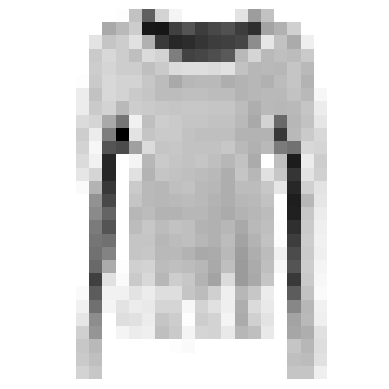

In [11]:
import numpy as np
image_index = np.random.randint(len(X_test))
image = np.array([X_test[image_index]])
confidences = model.predict(image)
confidence = np.max(confidences[0])
prediction = np.argmax(confidences[0])
print("Prediction:", class_names[prediction])
print("Confidence:", confidence)
print("Truth:", class_names[y_test[image_index]])
plt.imshow(image[0], cmap="binary")
plt.axis('off')
plt.show()


In [12]:
model.save("fashion_clf.keras")


Ex 2.

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
housing = fetch_california_housing()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target, test_size=0.2)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.5)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [ ]:
model_housing = tf.keras.models.Sequential(
    [
        tf.keras.layers.Normalization(axis=-1, input_shape=X_train.shape[1:]),
        tf.keras.layers.Dense(50, activation = "relu"),
        tf.keras.layers.Dense(50, activation = "relu"),
        tf.keras.layers.Dense(50, activation = "relu"),
        tf.keras.layers.Dense(1)
    ]
)

In [ ]:
model_housing.compile(
    loss = tf.keras.losses.MeanSquaredError(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = [tf.keras.metrics.RootMeanSquaredError()]
)

In [ ]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5, min_delta=0.01, verbose=1)


In [ ]:
logdir = os.path.join(os.curdir, "housing_logs")

tensorboard_cb = tf.keras.callbacks.TensorBoard(logdir)

history = model_housing.fit(X_train, y_train, epochs=30,
                            validation_data=(X_valid, y_valid), 
                            callbacks=[early_stopping_cb, tensorboard_cb])

In [ ]:
model_housing.save('reg_housing_1.keras')

In [ ]:
model_housing = tf.keras.models.Sequential(
    [
        tf.keras.layers.Normalization(axis=-1, input_shape=X_train.shape[1:]),
        tf.keras.layers.Dense(50, activation = "relu"),
        tf.keras.layers.Dense(25, activation = "relu"),
        tf.keras.layers.Dense(10, activation = "relu"),
        tf.keras.layers.Dense(1)
    ]
)

model_housing.compile(
    loss = tf.keras.losses.MeanSquaredError(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = [tf.keras.metrics.RootMeanSquaredError()]
)
logdir = os.path.join("housing_logs", "housing_logs_2")

tensorboard_cb = tf.keras.callbacks.TensorBoard(logdir)

history = model_housing.fit(X_train, y_train, epochs=30,
                            validation_data=(X_valid, y_valid), 
                            callbacks=[early_stopping_cb, tensorboard_cb])
model_housing.save('reg_housing_2.keras')

In [ ]:
model_housing = tf.keras.models.Sequential(
    [
        tf.keras.layers.Normalization(axis=-1, input_shape=X_train.shape[1:]),
        tf.keras.layers.Dense(50, activation = "relu"),
        tf.keras.layers.Dense(1)
    ]
)

model_housing.compile(
    loss = tf.keras.losses.MeanSquaredError(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = [tf.keras.metrics.RootMeanSquaredError()]
)
logdir = os.path.join("housing_logs", "housing_logs_3")

tensorboard_cb = tf.keras.callbacks.TensorBoard(logdir)

history = model_housing.fit(X_train, y_train, epochs=30,
                            validation_data=(X_valid, y_valid), 
                            callbacks=[early_stopping_cb, tensorboard_cb])
model_housing.save('reg_housing_3.keras')